In [4]:
import pandas as pd


c_df = pd.read_csv('./datasets/shipping_data.csv', low_memory=False)
c_df


FileNotFoundError: [Errno 2] No such file or directory: './datasets/shipping_data.csv'

In [43]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263821 entries, 0 to 263820
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              263821 non-null  object 
 1   price ($)         263821 non-null  float64
 2   weight (kg)       263808 non-null  float64
 3   length (m)        263637 non-null  float64
 4   width (m)         263821 non-null  float64
 5   height (m)        263821 non-null  float64
 6   shipment date     261183 non-null  object 
 7   destination port  263795 non-null  object 
dtypes: float64(5), object(3)
memory usage: 16.1+ MB


In [44]:
c_df.isna().sum()

name                   0
price ($)              0
weight (kg)           13
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
dtype: int64

In [45]:
c_df = c_df.drop(labels=['shipment date', 
                        ], axis=1)
c_df = c_df.dropna()
c_df['price ($)'] = c_df.pop('price ($)')

In [46]:
# 291개 일단은 레이블인코딩 해서 해봅시다.
c_df['name'].value_counts()

name
Hiking Boots            2974
Medium Box              2863
Large Box               2858
Coffee Maker            2261
Pallete of Coffee       2239
                        ... 
Tomatoes (Canned)        678
Wine Bottle              672
Pallete of Bird Food     666
Dog Crate                659
Golf Cart                652
Name: count, Length: 291, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

# dd = d_df.copy()
columns = ['name', 'destination port']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    label_encoders[column] = encoder.classes_
    c_df.loc[:, column] = result


# label_encoders

In [48]:
c_df

,name,weight (kg),length (m),width (m),height (m),destination port,price ($)
0,49,1.10,0.40,0.39,0.26,2,37.66
1,212,0.39,0.11,0.06,0.03,0,144.65
2,136,0.97,0.79,0.55,0.35,3,38.57
3,56,6.22,0.36,0.37,0.02,1,10.34
4,100,1.18,17.77,0.27,0.13,3,21.63
...,...,...,...,...,...,...,...
263816,52,3.80,0.38,0.37,0.28,0,23.58
263817,208,1.20,0.42,0.29,0.34,4,15.98
263818,182,477.58,1.00,0.92,1.48,4,223.05
263819,58,2.52,0.26,0.20,0.29,1,169.09


In [8]:
# import numpy as np
# from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# def get_evaluation(y_test, prediction):
#     MSE = mean_squared_error(y_test, prediction)
#     RMSE = np.sqrt(MSE)
#     MSLE = mean_squared_log_error(y_test, prediction)
#     RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
#     R2 = r2_score(y_test, prediction)
#     print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
#           .format(MSE, RMSE, MSLE, RMSLE, R2))


import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    R2 = r2_score(y_test, prediction)

    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE,  R2))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 3948452133.2856, RMSE: 62836.7101, R2: 0.0857


array([[<Axes: title={'center': 'weight (kg)'}>,
        <Axes: title={'center': 'length (m)'}>],
       [<Axes: title={'center': 'width (m)'}>,
        <Axes: title={'center': 'height (m)'}>],
       [<Axes: title={'center': 'price ($)'}>, <Axes: >]], dtype=object)

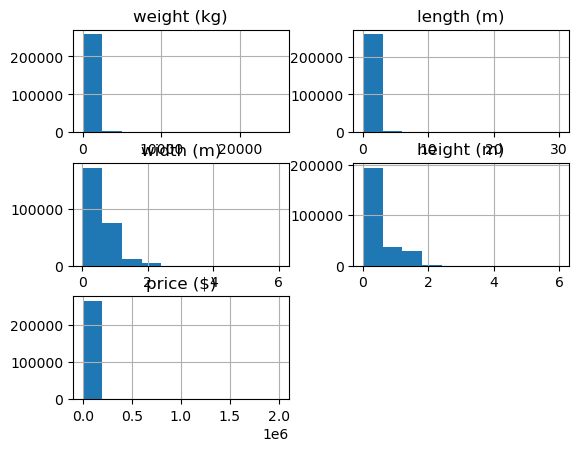

In [52]:
c_df.hist()

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1742786228.0024, RMSE: 41746.6912, R2: 0.5965


Exception ignored in: <function DMatrix.__del__ at 0x00000188ACE77100>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py", line 909, in __del__
KeyboardInterrupt: 

KeyboardInterrupt



In [54]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)

result = ptf.fit_transform(c_df[['price ($)']])
c_df['price ($)'] = result

result = ptf.fit_transform(c_df[['weight (kg)']])
c_df['weight (kg)'] = result

result = ptf.fit_transform(c_df[['length (m)']])
c_df['length (m)'] = result

result = ptf.fit_transform(c_df[['width (m)']])
c_df['width (m)'] = result

result = ptf.fit_transform(c_df[['height (m)']])
c_df['height (m)'] = result


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 0.3605, RMSE: 0.6004, R2: 0.4585


In [67]:
# 정수형으로 변환
c_df['destination port'] = c_df['destination port'].astype(int)
c_df['name'] = c_df['name'].astype(int)

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(n_estimators=100)
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=1, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r,gb_r,xgb_r,lgb_r, ridge]
for model in models:
    pipe = Pipeline([ (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

LinearRegression
MSE: 0.3605, RMSE: 0.6004, R2: 0.4585
DecisionTreeRegressor
MSE: 0.0586, RMSE: 0.2420, R2: 0.9120
GradientBoostingRegressor
MSE: 0.1416, RMSE: 0.3764, R2: 0.7873
XGBRegressor
MSE: 0.0314, RMSE: 0.1772, R2: 0.9529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 210878, number of used features: 6
[LightGBM] [Info] Start training from score 3.216151
LGBMRegressor
MSE: 0.0412, RMSE: 0.2030, R2: 0.9381
Ridge
MSE: 0.3605, RMSE: 0.6004, R2: 0.4585


array([[<Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'weight (kg)'}>,
        <Axes: title={'center': 'length (m)'}>],
       [<Axes: title={'center': 'width (m)'}>,
        <Axes: title={'center': 'height (m)'}>,
        <Axes: title={'center': 'destination port'}>],
       [<Axes: title={'center': 'price ($)'}>, <Axes: >, <Axes: >]],
      dtype=object)

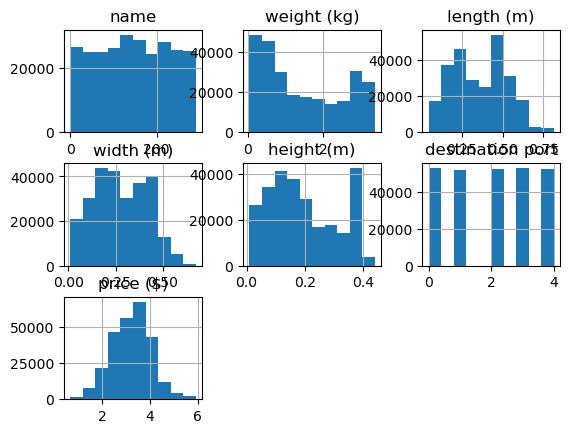

In [73]:
c_df.hist()

MSE: 0.0298, RMSE: 0.1727, R2: 0.9548


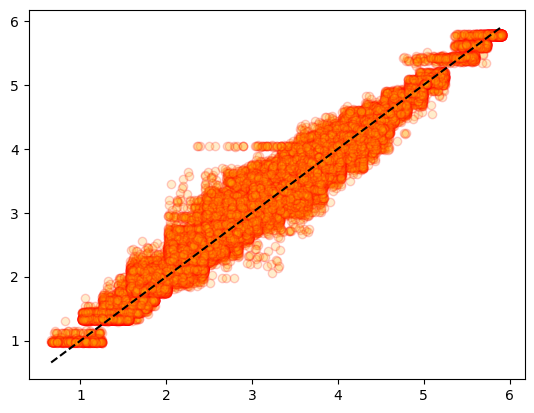

In [79]:
import matplotlib.pyplot as plt

xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.0314, RMSE: 0.1772, R2: 0.9529


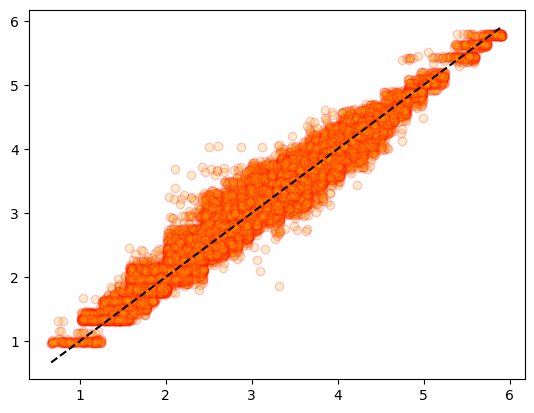

In [80]:
import matplotlib.pyplot as plt

xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

features = c_df

std = StandardScaler()
std_features = std.fit_transform(features)
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)

for column in std_under_h_df.columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

for column in std_under_h_df.columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

c_df = c_df.iloc[std_under_h_df.index].reset_index(drop=True)

name: 0건
weight (kg): 0건
length (m): 0건
width (m): 0건
height (m): 0건
destination port: 0건
price ($): 0건


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
# rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

In [ ]:
import matplotlib.pyplot as plt

dt_r.fit(X_train, y_train)
prediction = dt_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

dt_r.fit(X_train, y_train)
prediction = dt_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

array([[<Axes: title={'center': 'weight (kg)'}>,
        <Axes: title={'center': 'length (m)'}>],
       [<Axes: title={'center': 'width (m)'}>,
        <Axes: title={'center': 'height (m)'}>],
       [<Axes: title={'center': 'price ($)'}>, <Axes: >]], dtype=object)

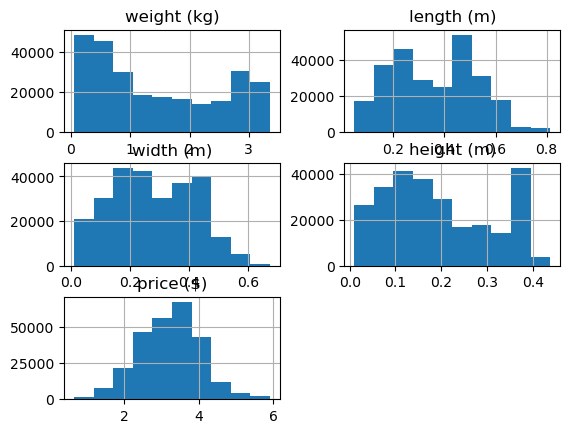

In [22]:
c_df.hist()

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(n_estimators=100)
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r, ridge]
for model in models:
    pipe = Pipeline([ (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

C:\ProgramData\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 10.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


NameError: name 'c_df' is not defined

In [3]:
import matplotlib.pyplot as plt

xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

NameError: name 'xgb_r' is not defined

MSE: 0.0314, RMSE: 0.1772, R2: 0.9529


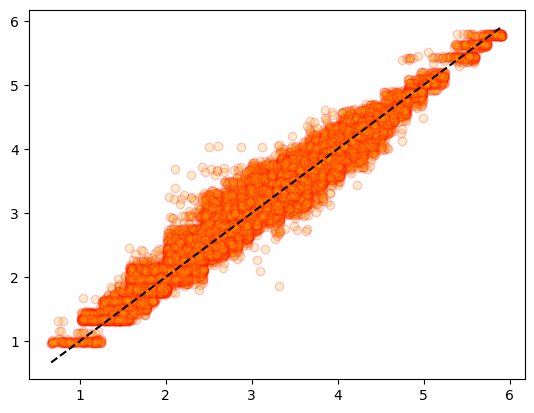

In [103]:
import matplotlib.pyplot as plt

xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [101]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
xgb_r = XGBRegressor(n_estimators=100, random_state=124)
score = cross_val_score(xgb_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[0.95054203 0.95168163 0.95292824 0.95082555 0.95143313 0.95124122
 0.95250388 0.95104895 0.95362649 0.95134458]
0.9517


In [102]:
xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0314, RMSE: 0.1772, R2: 0.9529
